In [2]:
import numpy as np
import pandas as pd
import keras
from keras.utils import np_utils

In [3]:
keras.datasets.mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
(x_Train, y_Train), (x_Test, y_Test) = keras.datasets.mnist.load_data()

In [5]:
print('x_train_image:',x_Train.shape)
print('y_train_label:',y_Train.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [6]:
print('x_test_image:',x_Test.shape)
print('y_test_label:',y_Test.shape)

x_test_image: (10000, 28, 28)
y_test_label: (10000,)


In [7]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

In [8]:
x_Train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

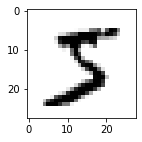

In [9]:
plot_image(x_Train[0])

In [10]:
y_Train[0]

5

In [11]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

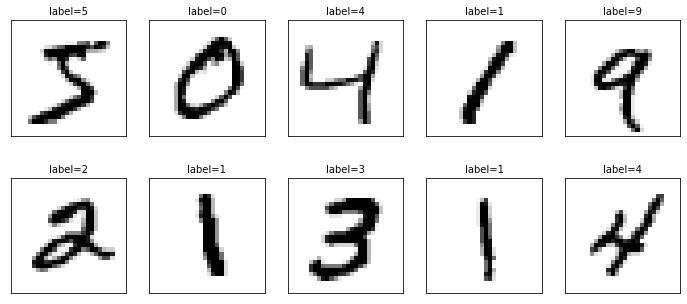

In [12]:
plot_images_labels_prediction(x_Train,y_Train,[],0,10)

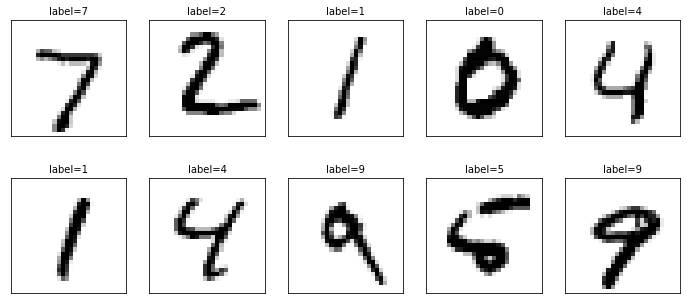

In [14]:
plot_images_labels_prediction(x_Test,y_Test,[],0,10)

In [15]:
x_Train.shape

(60000, 28, 28)

In [16]:
# 多加一個顏色的維度 
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [17]:
x_Train4D.shape

(60000, 28, 28, 1)

In [18]:
# 將數值縮小到0~1
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [19]:
# 把類別做Onehot encoding
y_TrainOneHot = np_utils.to_categorical(y_Train)   
y_TestOneHot = np_utils.to_categorical(y_Test)

In [20]:
y_Train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [21]:
y_TrainOneHot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## 建立CNN模型

In [37]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [38]:
model = Sequential()

In [39]:
#filter為16, Kernel size為(5,5),Padding為(same)
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

In [40]:
# MaxPooling size為(2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

In [41]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

In [42]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [43]:
# Drop掉部分神經元避免overfitting
model.add(Dropout(0.25))

In [44]:
# 平坦化
model.add(Flatten())

In [45]:
model.add(Dense(128, activation='relu'))

In [46]:
model.add(Dropout(0.5))

In [47]:
model.add(Dense(10,activation='softmax'))

In [48]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               225920    
__________

## 組裝

In [49]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

## 訓練模型

In [50]:
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=20, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 151s - loss: 0.4935 - acc: 0.8467 - val_loss: 0.0978 - val_acc: 0.9702
Epoch 2/20
 - 144s - loss: 0.1412 - acc: 0.9573 - val_loss: 0.0708 - val_acc: 0.9777
Epoch 3/20
 - 140s - loss: 0.1012 - acc: 0.9698 - val_loss: 0.0540 - val_acc: 0.9827
Epoch 4/20
 - 144s - loss: 0.0841 - acc: 0.9751 - val_loss: 0.0457 - val_acc: 0.9868
Epoch 5/20
 - 144s - loss: 0.0715 - acc: 0.9784 - val_loss: 0.0411 - val_acc: 0.9877
Epoch 6/20
 - 163s - loss: 0.0621 - acc: 0.9811 - val_loss: 0.0376 - val_acc: 0.9892
Epoch 7/20
 - 158s - loss: 0.0544 - acc: 0.9834 - val_loss: 0.0332 - val_acc: 0.9906
Epoch 8/20
 - 154s - loss: 0.0520 - acc: 0.9842 - val_loss: 0.0332 - val_acc: 0.9907
Epoch 9/20
 - 157s - loss: 0.0451 - acc: 0.9865 - val_loss: 0.0318 - val_acc: 0.9903
Epoch 10/20
 - 153s - loss: 0.0394 - acc: 0.9882 - val_loss: 0.0313 - val_acc: 0.9910
Epoch 11/20
 - 149s - loss: 0.0387 - acc: 0.9878 - val_loss: 0.0306 - val_acc: 0.9910
Epoch 12/20
 

In [51]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

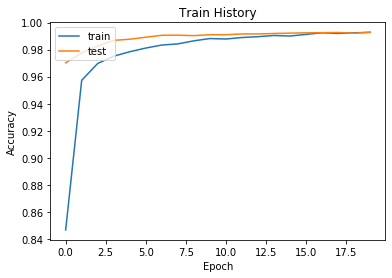

In [52]:
show_train_history('acc','val_acc')

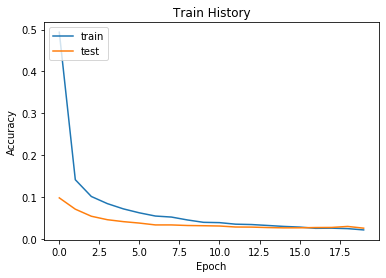

In [53]:
show_train_history('loss','val_loss')

## 評估模型準確率

In [54]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 14s 1ms/step


0.9934

## 預測結果

In [55]:
prediction=model.predict_classes(x_Test4D_normalize)

In [56]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

## 查看預測結果

In [57]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

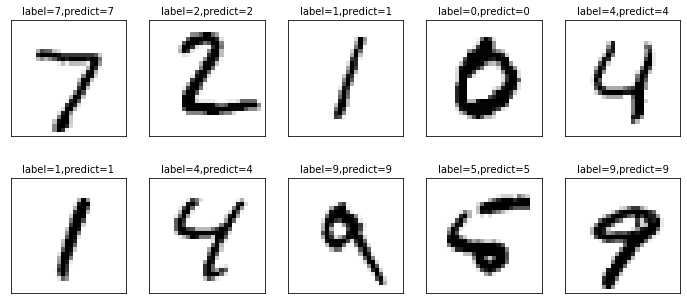

In [58]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

## 儲存結果

In [59]:
model_json = model.to_json()
open('CNN change2_model_cnn.json', 'w').write(model_json)
model.save_weights('CNN change2_weights_cnn.h5')

## 取回訓練好的神經網路

In [33]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [34]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [35]:
from keras.models import model_from_json

In [36]:
model = model_from_json(open('CNN change2_model_cnn.json').read())
model.load_weights('CNN change2_weights_cnn.h5')

In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [38]:
(x_Train, y_Train), (x_Test, y_Test) = keras.datasets.mnist.load_data()

In [39]:
x_Train.shape

(60000, 28, 28)

In [40]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [41]:
x_Train4D.shape

(60000, 28, 28, 1)

In [42]:
# 將數值縮小到0~1
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [43]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [44]:
y_Train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [45]:
y_TrainOneHot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)